In [5]:
import nltk
from nltk import Text, sent_tokenize, word_tokenize, RegexpTokenizer

In [22]:
import pandas as pd

In [39]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
sleep = open('/home/amn34/metis/stuff/noirs/chandler/rc_bigsleep.txt').read()

In [6]:
sleep[0:50]

"It was about eleven o'clock in the morning, mid Oc"

In [7]:
sleep = sleep.decode('utf-8')

In [8]:
sleep = sleep.lower()

In [9]:
sleep[0:50]

u"it was about eleven o'clock in the morning, mid oc"

In [6]:
tokenizer = RegexpTokenizer(r'\w+')

In [11]:
sleepwords = tokenizer.tokenize(sleep)

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.append('said')

In [13]:
sleepstop = [w for w in sleepwords if not w in stop]

In [27]:
sent = pd.read_pickle('sentiment.pkl')

In [28]:
sent.fillna(0, inplace=True)

In [29]:
sent.sentiment.replace({'negative':-1,'positive':1}, inplace=True)

In [30]:
sent['word'] = sent['word'].values.astype('unicode')

In [18]:
sleepwords = pd.DataFrame(columns=['word'])

In [19]:
sleepwords.word = sleepstop

In [22]:
sleepsentiment = pd.merge(sleepwords, sent, how='left', on='word')

In [23]:
sleepsentiment['index'] = sleepsentiment.index

In [24]:
sleepsentiment.head()

,word,emotion,sentiment,index
0,eleven,NaN,NaN,0
1,clock,anticipation,0.0,1
2,morning,NaN,NaN,2
3,mid,0,0.0,3
4,october,NaN,NaN,4


In [92]:
len(sleepstop)

31642

In [95]:
import numpy as np

In [25]:
sleepsentiment.fillna(0,inplace=True)

In [26]:
sample = sleepsentiment[0:1000]

In [35]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in xrange(0, len(seq), size))

In [38]:
pagesent = []

for i in chunker(sleepsentiment,150):
    pagesent.append([sum(i.sentiment)])

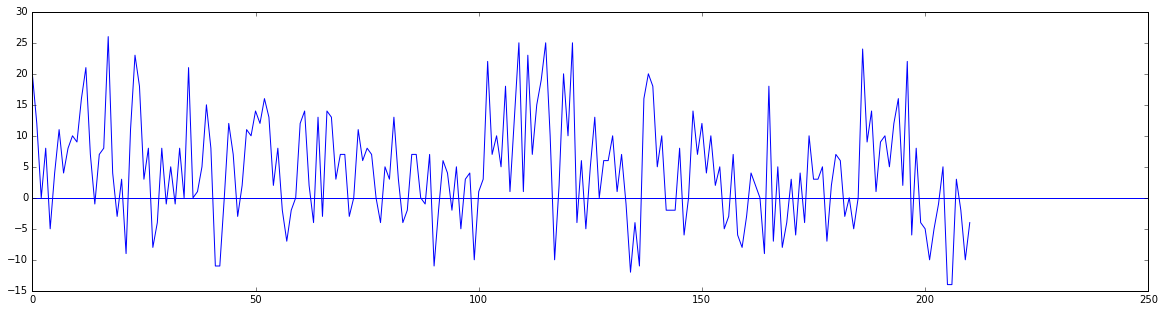

In [47]:
plt.figure(figsize=(20,5))
plt.axhline(y=0)
plt.plot(pagesent)

In [1]:
zal = open('/home/amn34/Desktop/zal.txt').read()

In [2]:
zal = zal.decode('utf-8')

In [3]:
zal = zal.lower()

In [7]:
zalwords = tokenizer.tokenize(zal)

In [8]:
len(zalwords)

2960

In [9]:
len(set(zalwords))

747

In [10]:
mecount = 0
youcount = 0
uscount = 0

for word in zalwords:
    me = ['i','me','my','myself']
    you = ['you','yourself']
    us = ['we','us','ourselves']

    if word in me:
        mecount+=1
    elif word in you:
        youcount +=1
    elif word in us:
        uscount += 1
print 'me', mecount, 'you', youcount, 'us', uscount
print mecount/float(len(zalwords)), youcount/float(len(zalwords)), uscount/float(len(zalwords))

me 261 you 70 us 10
0.0881756756757 0.0236486486486 0.00337837837838


In [11]:
from collections import Counter

In [12]:
zaldict = Counter(zalwords)

In [13]:
zaldict.most_common()

[(u'i', 196),
 (u'to', 119),
 (u'that', 82),
 (u'and', 74),
 (u'the', 74),
 (u'you', 70),
 (u'of', 60),
 (u't', 51),
 (u'a', 45),
 (u'it', 44),
 (u'in', 35),
 (u'this', 33),
 (u'me', 29),
 (u'my', 29),
 (u've', 29),
 (u's', 27),
 (u'for', 24),
 (u'but', 24),
 (u'was', 23),
 (u'have', 22),
 (u'like', 21),
 (u'at', 21),
 (u'm', 21),
 (u'don', 20),
 (u'not', 19),
 (u'your', 19),
 (u'think', 18),
 (u'as', 18),
 (u'or', 17),
 (u'on', 16),
 (u'so', 16),
 (u'been', 16),
 (u'd', 16),
 (u'be', 16),
 (u'felt', 16),
 (u'all', 15),
 (u'feel', 15),
 (u'about', 15),
 (u'with', 15),
 (u'is', 14),
 (u'what', 13),
 (u'know', 13),
 (u'any', 12),
 (u'just', 12),
 (u'trying', 12),
 (u'still', 11),
 (u'time', 11),
 (u'we', 10),
 (u'people', 10),
 (u'now', 9),
 (u'pretty', 9),
 (u'things', 9),
 (u'again', 9),
 (u'when', 9),
 (u'here', 8),
 (u'really', 8),
 (u'after', 8),
 (u'response', 8),
 (u'friendship', 8),
 (u'our', 8),
 (u'why', 8),
 (u'some', 8),
 (u'who', 8),
 (u'way', 8),
 (u'no', 8),
 (u'more', 7),

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [15]:
zalstop = [word for word in zalwords if word not in stop]

In [16]:
zalstopdict = Counter(zalstop)

In [17]:
zalstopdict.most_common()

[(u'like', 21),
 (u'think', 18),
 (u'felt', 16),
 (u'feel', 15),
 (u'know', 13),
 (u'trying', 12),
 (u'still', 11),
 (u'time', 11),
 (u'people', 10),
 (u'pretty', 9),
 (u'things', 9),
 (u'response', 8),
 (u'friendship', 8),
 (u'really', 8),
 (u'way', 8),
 (u'abuse', 7),
 (u'since', 7),
 (u'one', 7),
 (u'also', 7),
 (u'stop', 7),
 (u'hurt', 6),
 (u'something', 6),
 (u'done', 6),
 (u'talking', 6),
 (u'fact', 6),
 (u'said', 6),
 (u'last', 6),
 (u'point', 6),
 (u'much', 6),
 (u'life', 6),
 (u'obviously', 6),
 (u'right', 6),
 (u'issues', 5),
 (u'past', 5),
 (u'even', 5),
 (u'would', 5),
 (u'sort', 5),
 (u'want', 5),
 (u'could', 5),
 (u'say', 5),
 (u'nothing', 5),
 (u'made', 5),
 (u'probably', 5),
 (u'feeling', 5),
 (u'make', 5),
 (u'well', 5),
 (u'person', 5),
 (u'night', 5),
 (u'although', 5),
 (u'try', 4),
 (u'work', 4),
 (u'reason', 4),
 (u'end', 4),
 (u'talk', 4),
 (u'course', 4),
 (u'tendency', 4),
 (u'might', 4),
 (u'mean', 4),
 (u'care', 4),
 (u'thing', 4),
 (u'first', 4),
 (u'self',

In [54]:
len(zalstop)

1216

In [18]:
wordlengths = []
for word in zalwords:
    wordlengths.append([len(word),word])

In [19]:
sorted(wordlengths, reverse=True)

[[16, u'acquaintanceship'],
 [16, u'acquaintanceship'],
 [14, u'unquestionably'],
 [14, u'subconsciously'],
 [14, u'simultaneously'],
 [14, u'definitionally'],
 [14, u'clarifications'],
 [13, u'uninteresting'],
 [13, u'uncomfortable'],
 [13, u'psychological'],
 [13, u'intentionally'],
 [13, u'intentionally'],
 [13, u'intentionally'],
 [13, u'conversations'],
 [13, u'consideration'],
 [13, u'companionship'],
 [13, u'communication'],
 [13, u'communication'],
 [13, u'acquaintances'],
 [12, u'sympathizing'],
 [12, u'romantically'],
 [12, u'relationship'],
 [12, u'relationship'],
 [12, u'pathetically'],
 [12, u'overwhelming'],
 [12, u'overthinking'],
 [12, u'interactions'],
 [12, u'interactions'],
 [12, u'illegitimate'],
 [12, u'functionally'],
 [12, u'functionally'],
 [12, u'dramatically'],
 [12, u'conversation'],
 [12, u'continuously'],
 [11, u'strenuously'],
 [11, u'storyboards'],
 [11, u'resentments'],
 [11, u'overbearing'],
 [11, u'opportunity'],
 [11, u'objectively'],
 [11, u'meaningl

In [23]:
zaldict = pd.DataFrame(columns=['word'])

In [24]:
zaldict.word = zalwords

In [31]:
zalzentiment = pd.merge(zaldict, sent, how='left', on='word')

In [32]:
zalzentiment.fillna(0,inplace=True)

In [33]:
zalzentiment.head()

,word,emotion,sentiment
0,while,0,0.0
1,writing,0,0.0
2,this,0,0.0
3,i,0,0.0
4,found,joy,1.0


In [36]:
zentsent = []

for i in chunker(zalzentiment,15):
    zentsent.append([sum(i.sentiment)])

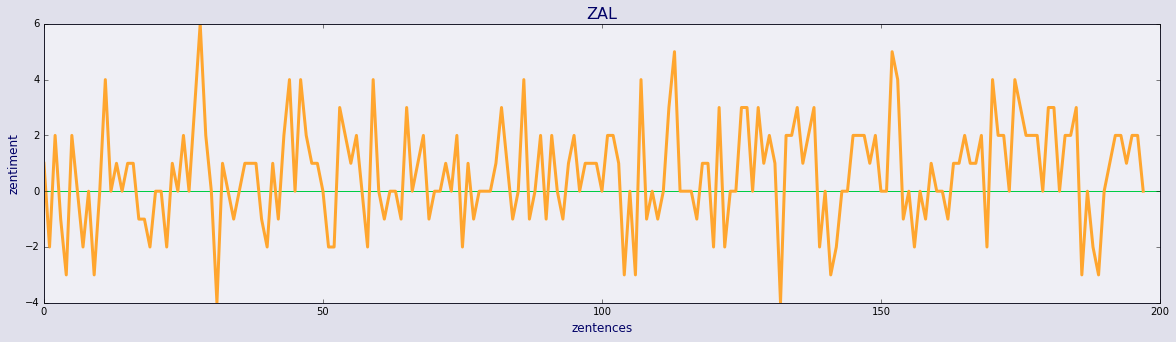

In [145]:
fig = plt.figure(figsize=(20,5),facecolor='#e0e0eb')
ax=plt.gca()
ax.set_axis_bgcolor('#efeff5')
matplotlib.rc('axes',edgecolor='#1f1f2e')
plt.axhline(y=0, color = '#00cc44')
plt.plot(zentsent, color = '#FFA62F',linewidth=3)
plt.xlabel('zentences', color = '#000066', fontsize=12)
plt.ylabel('zentiment', color = '#000066', fontsize=12)
plt.title('ZAL', color = '#000066', fontsize=16)

In [149]:
zalzent = sent_tokenize(zal)

In [156]:
zalzent[99]

u'-sal'

In [37]:
zentsent30 = []

for i in chunker(zalzentiment,30):
    zentsent30.append(sum(i.sentiment))

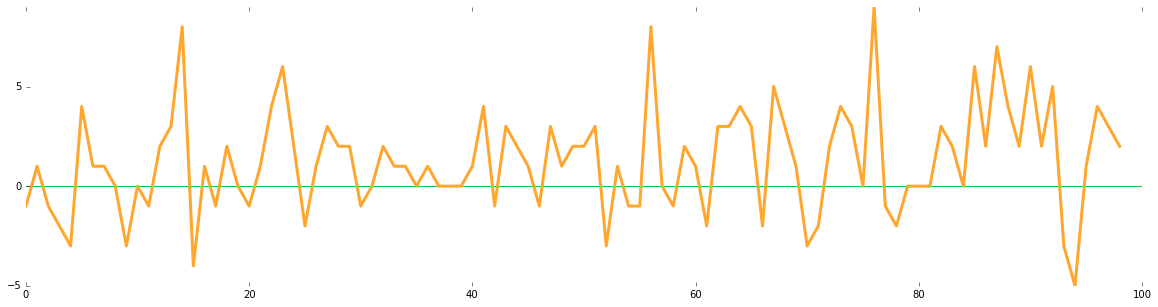

In [53]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes(frameon=False)
ax.get_yaxis().tick_left()
plt.yticks(range(-5,11, 5))
matplotlib.rc('axes',edgecolor='#19194d')
plt.axhline(y=0, color = '#00cc44')
plt.plot(zentsent30, color = '#FFA62F',linewidth=3)
#plt.xlabel('zentences', color = '#19194d', fontsize=12, **hfont)
#plt.ylabel('zentiment', color = '#19194d', fontsize=12, **hfont)

In [164]:
sum(zentsent30)

124.0

In [166]:
set(zalzentiment.emotion.values)

{0,
 'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust'}

In [167]:
zalemos = zalzentiment.emotion.values

In [168]:
z = Counter(zalemos)

In [169]:
z.most_common()

[(0, 2722),
 ('anger', 59),
 ('anticipation', 57),
 ('trust', 54),
 ('joy', 21),
 ('fear', 18),
 ('sadness', 17),
 ('disgust', 7),
 ('surprise', 5)]

In [170]:
sentiments = zalzentiment.sentiment.values

In [171]:
sentiments

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [172]:
Counter(sentiments)

Counter({-1.0: 201, 0.0: 2434, 1.0: 325})